# Your Uni : tz2656, ac5631, lz2990
# Your Full name : Tiantian Zhao, Ao Chan, Longjie Zhang
# Link to your Public Github repository with Final report  : https://github.com/aochannn/QMSS5074-Project1


### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [4]:
from xml.etree.ElementPath import xpath_tokenizer

import pandas as pd
from numpy.distutils.system_info import x11_info
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
whr_df = pd.read_csv('data/WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [5]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
# y_test_labels = ## Complete in a similar manner as above

Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

In [6]:
# # Your answer:
# 1. Converts y_train to a categorical data type: y_train.astype('category') ensures that the variable is treated as categorical.
# 2. Assigns numerical codes to the categories: .cat.codes replaces each category label ('Very Low', 'Low', 'Average', 'High', 'Very High') with an integer code (e.g., 0, 1, 2, 3, 4). The order is determined by the order of categories in pd.qcut.
#
# Difference between y_train_labels and y_train:
# 1. y_train: A categorical variable with string labels like 'Very Low', 'Low', 'Average', etc.
# 2. y_train_labels: A numerical representation of y_train, where each category is replaced with an integer.
#
# This transformation is useful for machine learning models that require numerical input rather than string labels.

<h3> Add new data

In [7]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("data/newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [8]:
# Check which countries are common in both datasets:
common_countries = set(X_train['country']).intersection(set(countrydata['country_name']))
print(f"Number of common countries: {len(common_countries)}")

Number of common countries: 89


In [9]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

X_train = X_train.merge(countrydata, left_on='country', right_on='country_name', how='left').drop(columns=['country_name'])
X_test = X_test.merge(countrydata, left_on='country', right_on='country_name', how='left').drop(columns=['country_name'])

In [10]:
display(X_train.head(1))
print(X_train.shape)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


(95, 15)


## 1.  EDA

In [11]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [12]:
# ## Your answer:
# The output of print(X_train.dtypes) shows the data types of each column in the X_train dataset:
#
# 	1. Categorical Variable:
# 	•	country (object): Represents country names as text.
# 	•	region (object): Represents regional classifications as text.
#
# 	2.	Numerical Variables (float64):
#     The rest of the columns contain continuous numerical data:
# 	•	Economic Indicators:
# 	•	gdp_per_capita: GDP per capita.
# 	•	gni: Gross National Income.
# 	•	Social & Development Indicators:
# 	•	social_support: Measure of social support.
# 	•	population: Total population.
# 	•	population_below_poverty_line: Percentage of the population below the poverty line.
# 	•	hdi: Human Development Index.
# 	•	Health & Education Indicators:
# 	•	healthy_life_expectancy: Expected healthy life years.
# 	•	life_expectancy: Overall life expectancy.
# 	•	expected_years_of_schooling: Estimated years of schooling.
# 	•	mean_years_of_schooling: Average years of schooling.
# 	•	Governance & Society Indicators:
# 	•	freedom_to_make_life_choices: Perceived level of freedom.
# 	•	generosity: Measure of generosity.
# 	•	perceptions_of_corruption: Perceived level of corruption.
#
#     Key Observations:
# 	•	All numerical values are stored as float64, meaning they support decimal precision.
# 	•	The categorical variables (country and region) might need encoding if used in machine learning models.
# 	•	This dataset contains economic, social, health, education, and governance-related features, which seem relevant for predicting happiness or quality-of-life measures.


Find out the number and percentage of missing values in the table per column

In [13]:
# Your code here:

num_missing = X_train.isnull().sum()
percent_missing = num_missing / X_train.shape[0]

print(num_missing)
print(percent_missing)

country                           0
region                            0
gdp_per_capita                    0
social_support                    0
healthy_life_expectancy           0
freedom_to_make_life_choices      0
generosity                        0
perceptions_of_corruption         0
population                        6
population_below_poverty_line    16
hdi                               6
life_expectancy                   7
expected_years_of_schooling       7
mean_years_of_schooling           7
gni                               7
dtype: int64
country                          0.000000
region                           0.000000
gdp_per_capita                   0.000000
social_support                   0.000000
healthy_life_expectancy          0.000000
freedom_to_make_life_choices     0.000000
generosity                       0.000000
perceptions_of_corruption        0.000000
population                       0.063158
population_below_poverty_line    0.168421
hdi                        

Plot the frequency distribution / histogram of some of the numerical features that you think are important

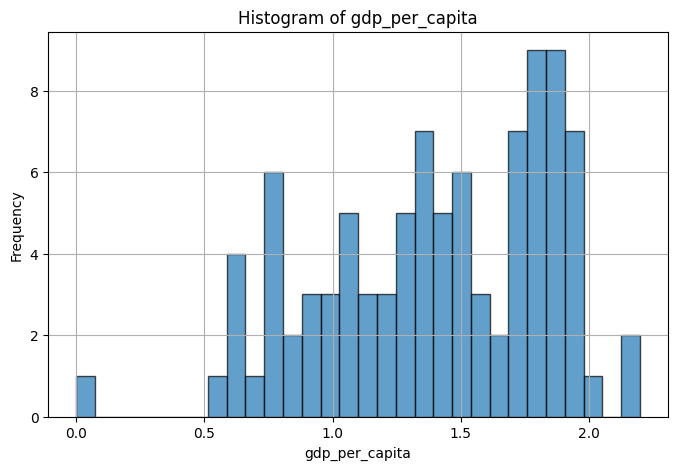

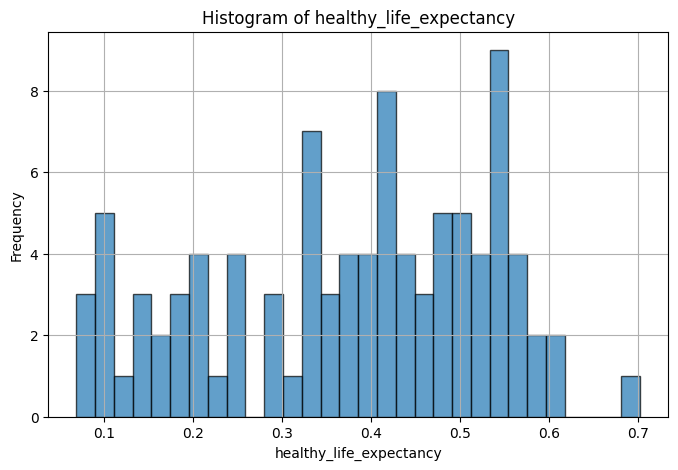

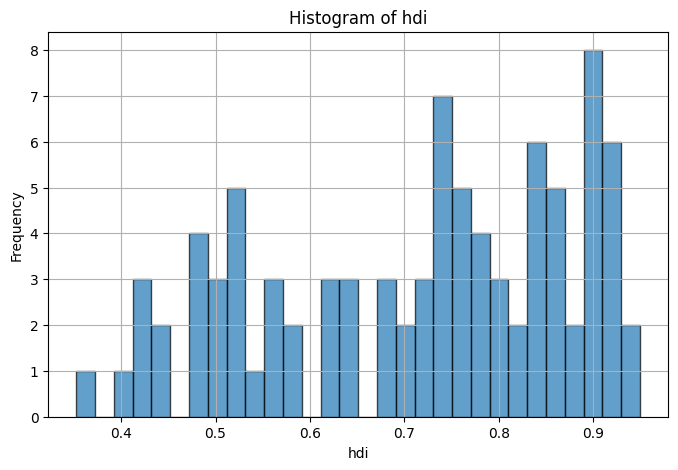

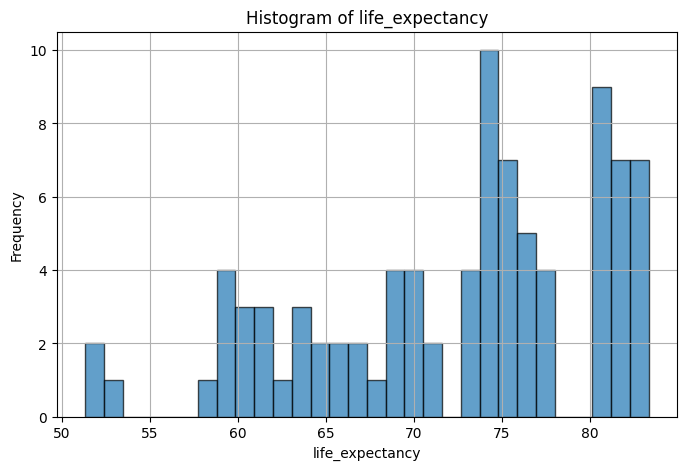

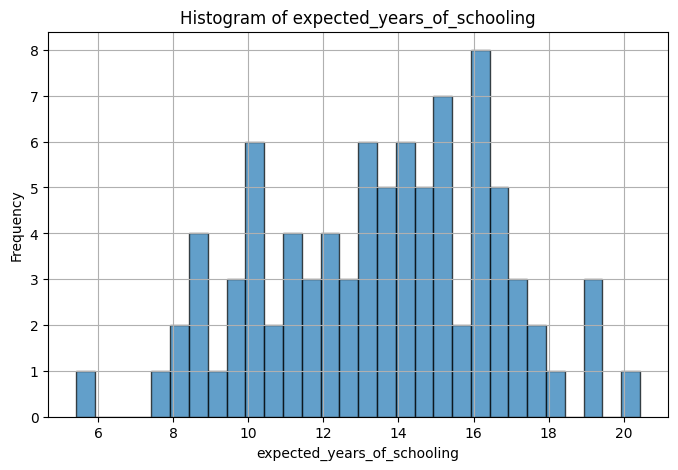

In [14]:
# Your plotting code here:
# List of important numerical features for visualization
important_features = [
    'gdp_per_capita',
    'healthy_life_expectancy',
    'hdi',
    'life_expectancy',
    'expected_years_of_schooling'
]

# Plot histograms for the selected features
for feature in important_features:
    plt.figure(figsize=(8, 5))
    plt.hist(X_train[feature], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.grid(True)
    plt.show()

Plot the categorical variables and their distribution

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/329036185.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X_train[feature], order=X_train[feature].value_counts().index, palette="viridis")


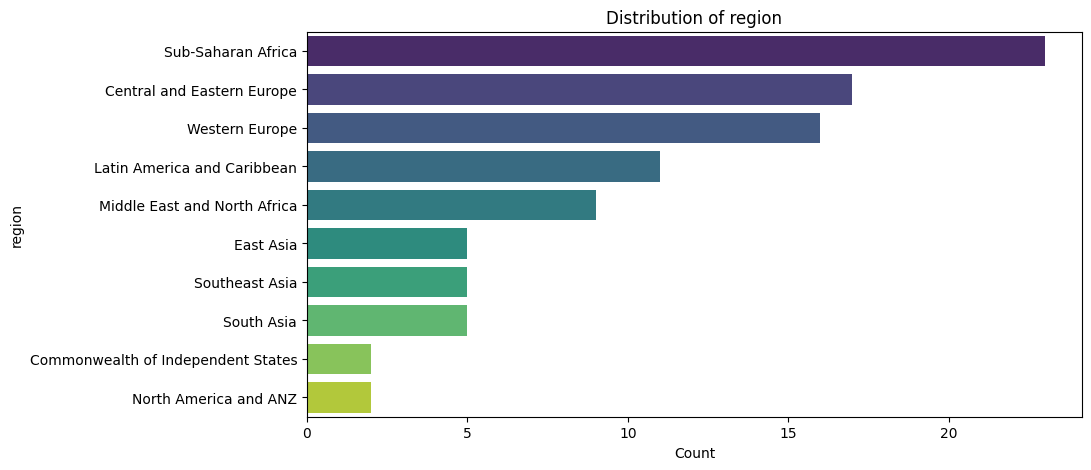

In [15]:
# Your plotting code here:

# Categorical variables
categorical_features = ['region']

# Plot bar charts for categorical variables
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=X_train[feature], order=X_train[feature].value_counts().index, palette="viridis")
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

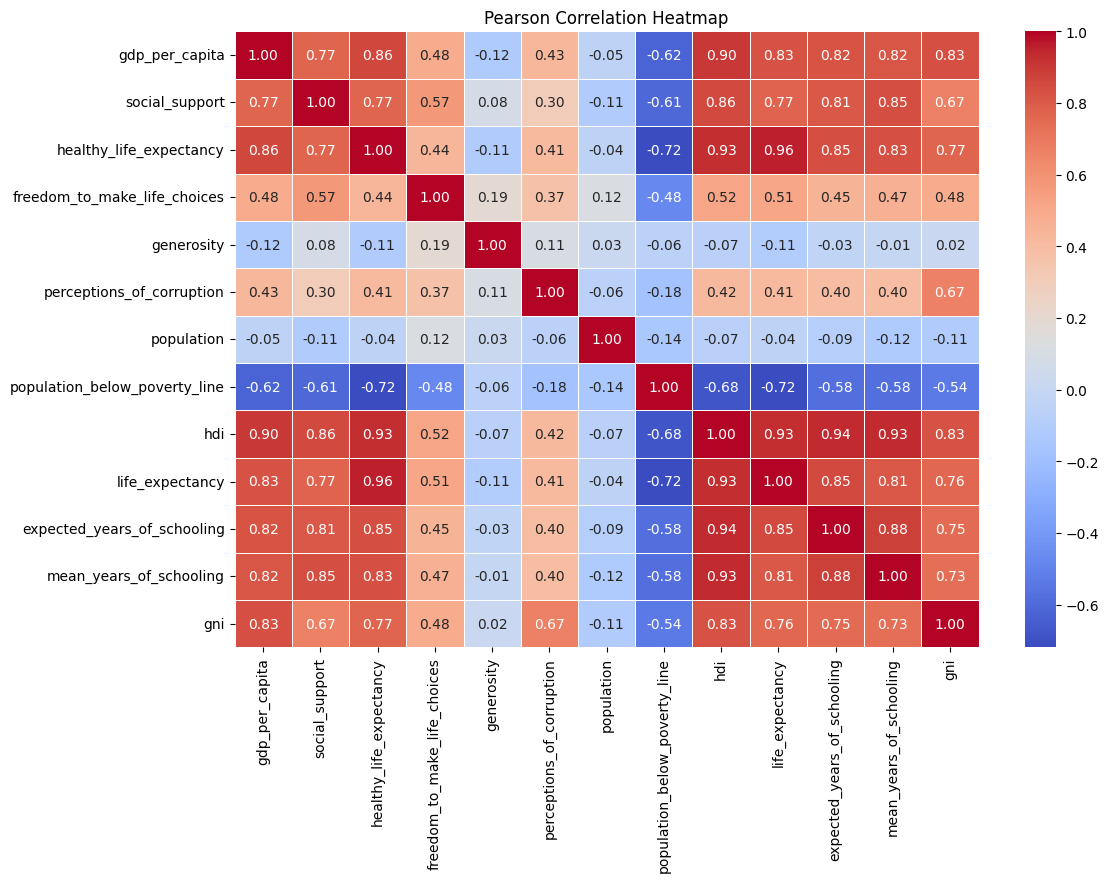

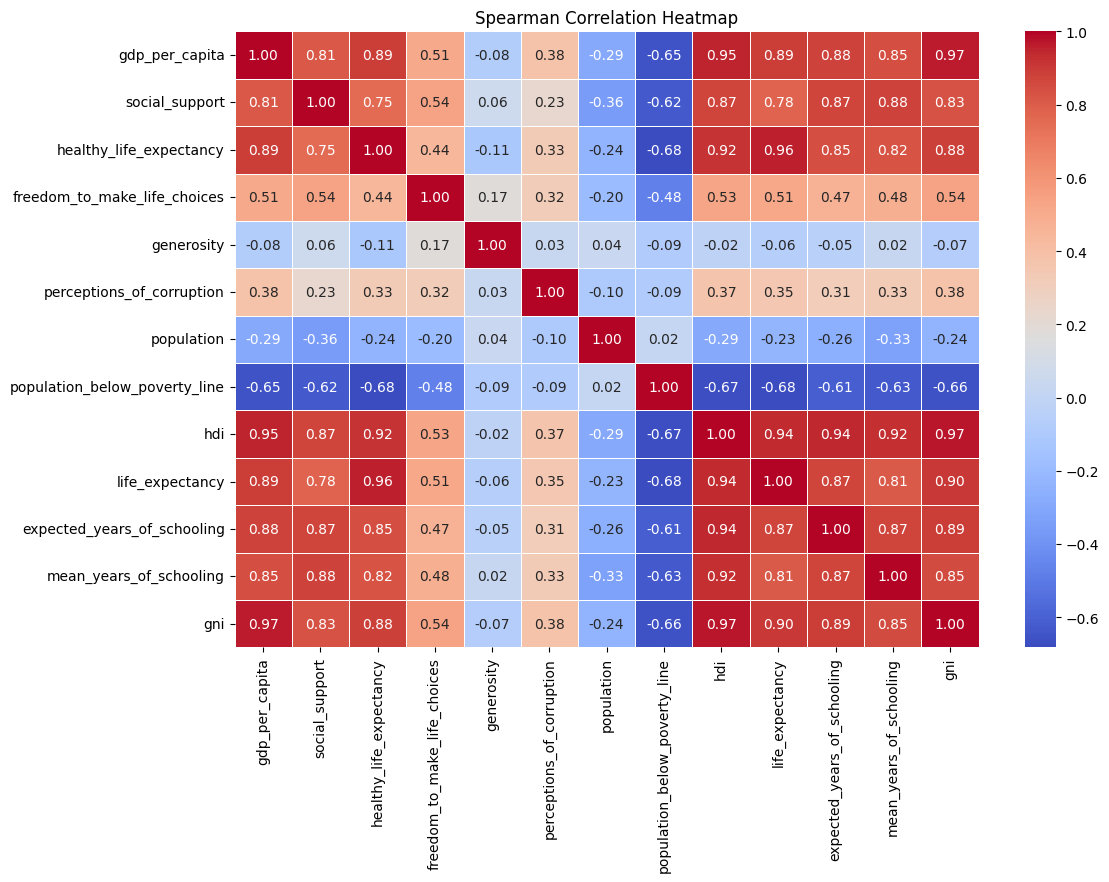

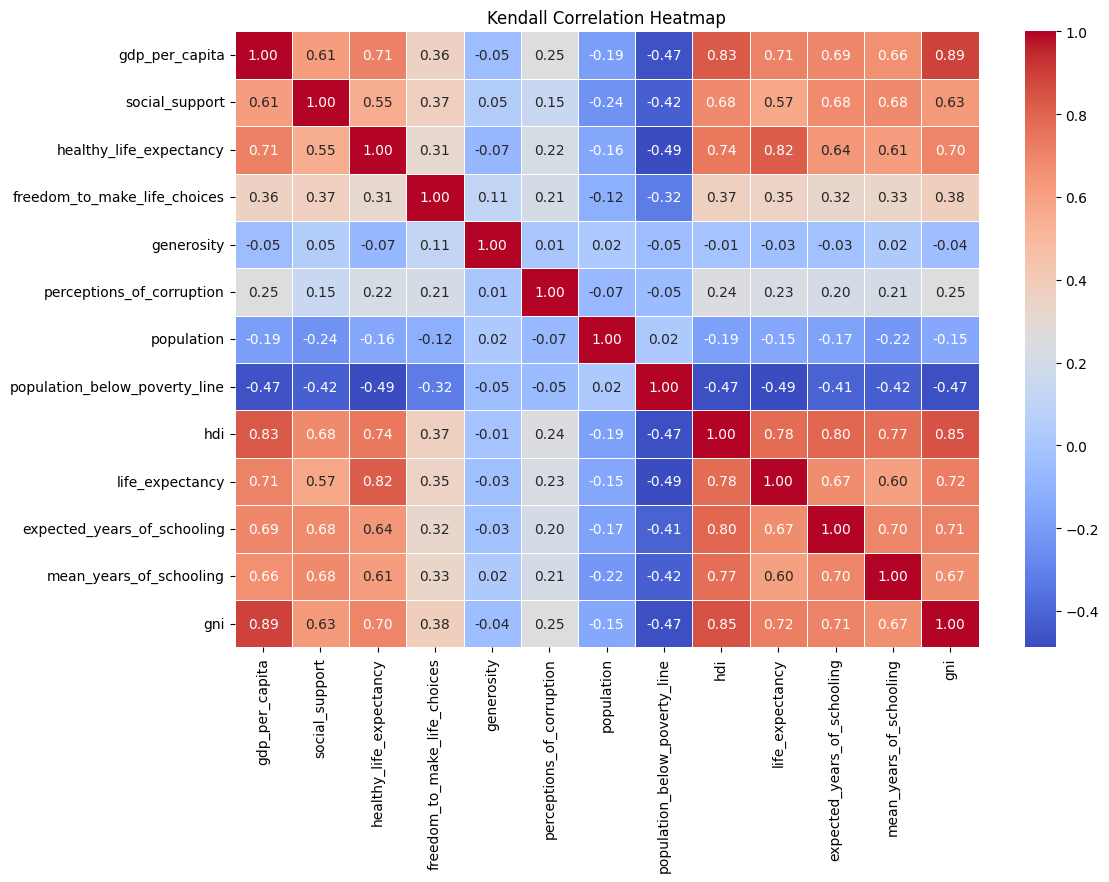

In [16]:
# Your code here:

X_train_num = X_train.select_dtypes(include=['number'])

# Compute correlation matrices
pearson_corr = X_train_num.corr(method='pearson')
spearman_corr = X_train_num.corr(method='spearman')
kendall_corr = X_train_num.corr(method='kendall')

# Function to plot correlation heatmaps
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot heatmaps
plot_correlation_heatmap(pearson_corr, "Pearson Correlation Heatmap")
plot_correlation_heatmap(spearman_corr, "Spearman Correlation Heatmap")
plot_correlation_heatmap(kendall_corr, "Kendall Correlation Heatmap")

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

In [ ]:
# Your plotting code(s) here:

# Convert categorical target variable into numerical labels
# Compute correlation with numerical features
feature_correlation = X_train_num.corrwith(y_train_labels, method='spearman')
print(feature_correlation.sort_values(ascending=False))

population_below_poverty_line    0.127085
expected_years_of_schooling      0.074950
perceptions_of_corruption        0.058748
social_support                   0.048397
generosity                       0.025733
hdi                              0.020882
healthy_life_expectancy          0.018047
freedom_to_make_life_choices     0.009483
life_expectancy                 -0.013312
gdp_per_capita                  -0.013474
mean_years_of_schooling         -0.026189
gni                             -0.029662
population                      -0.232541
dtype: float64


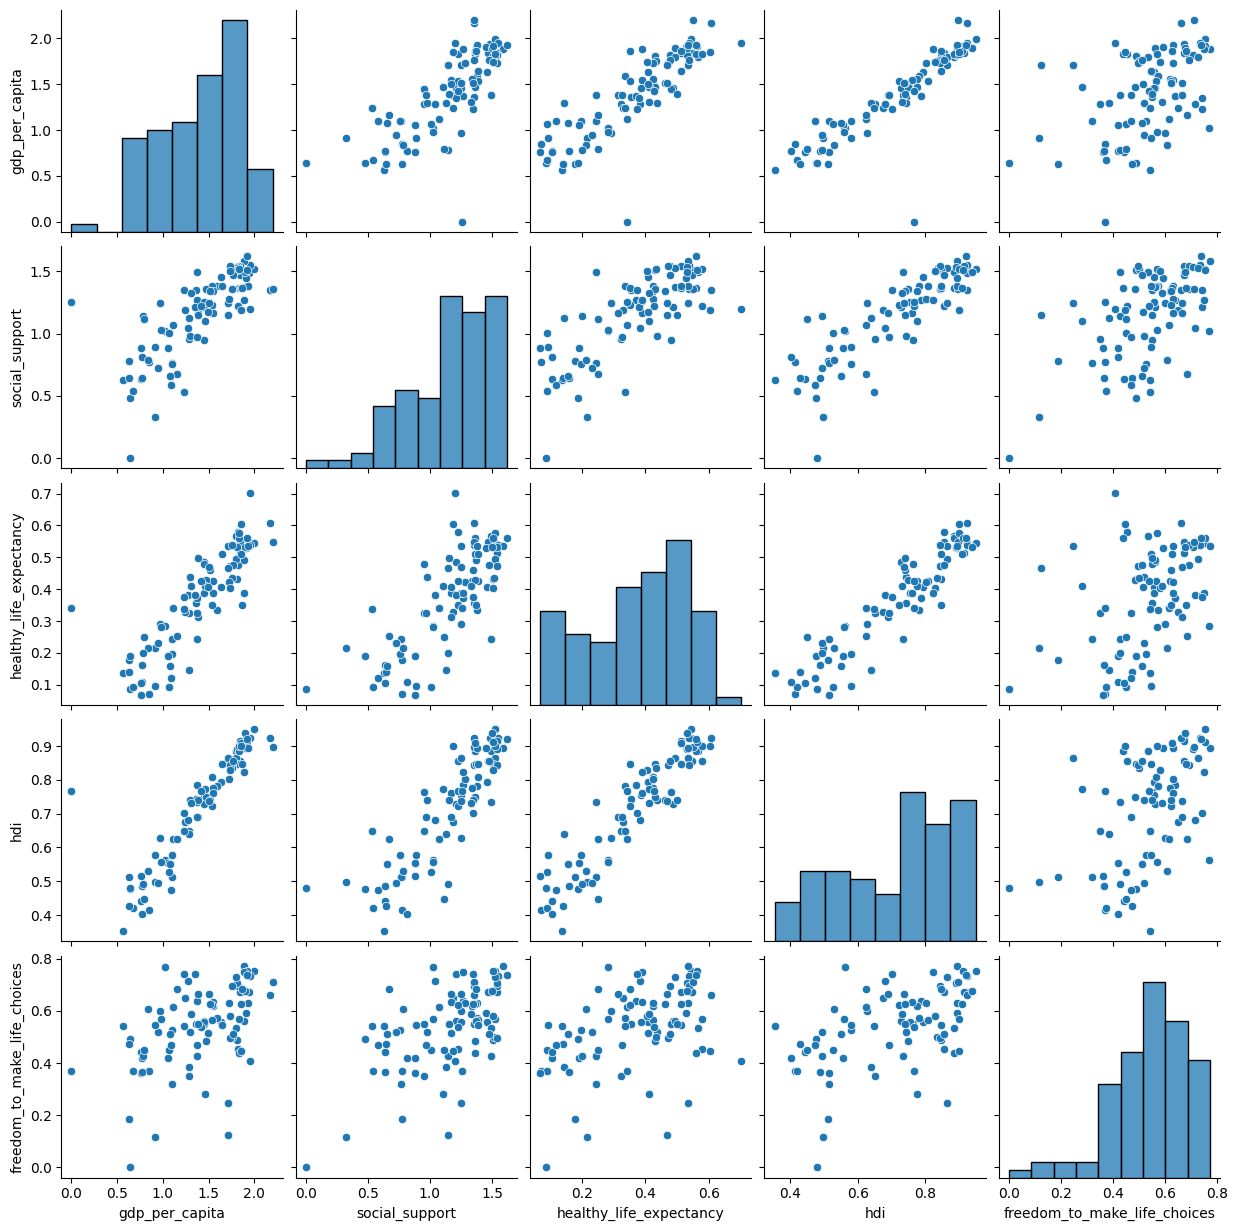

In [18]:
# Select a few key features based on correlation analysis
key_features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'hdi', 'freedom_to_make_life_choices']

# Create scatterplots
sns.pairplot(X_train_num[key_features])
plt.show()

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/3409709949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train_num[feature], palette="viridis")


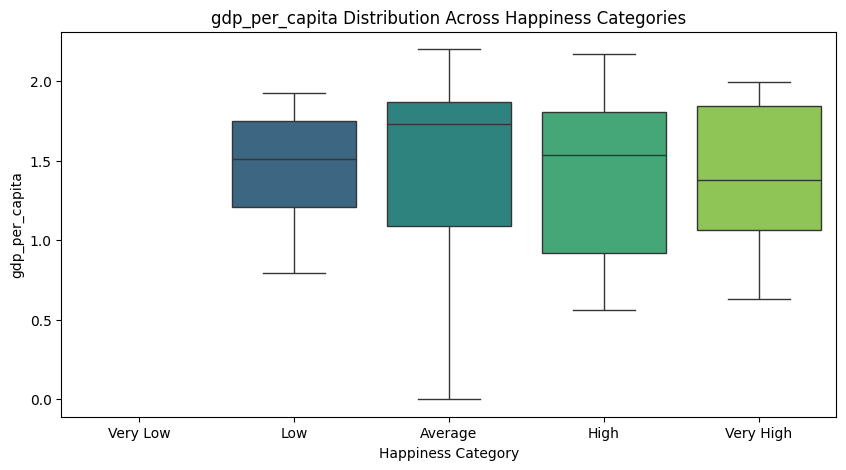

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/3409709949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train_num[feature], palette="viridis")


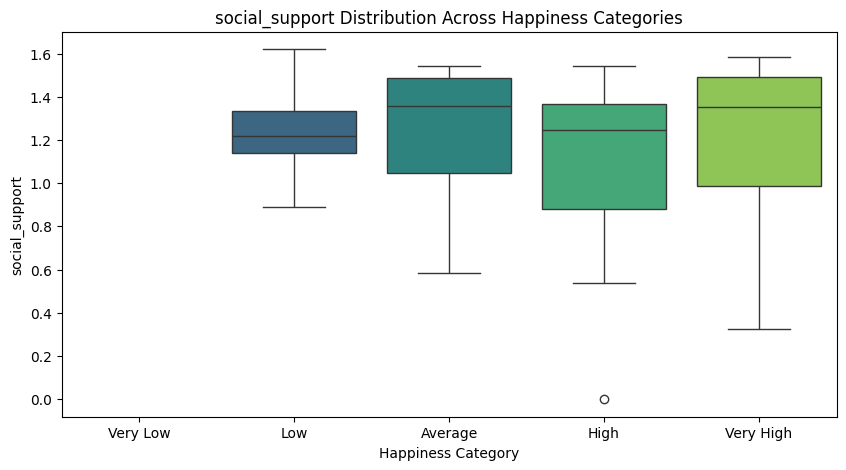

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/3409709949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train_num[feature], palette="viridis")


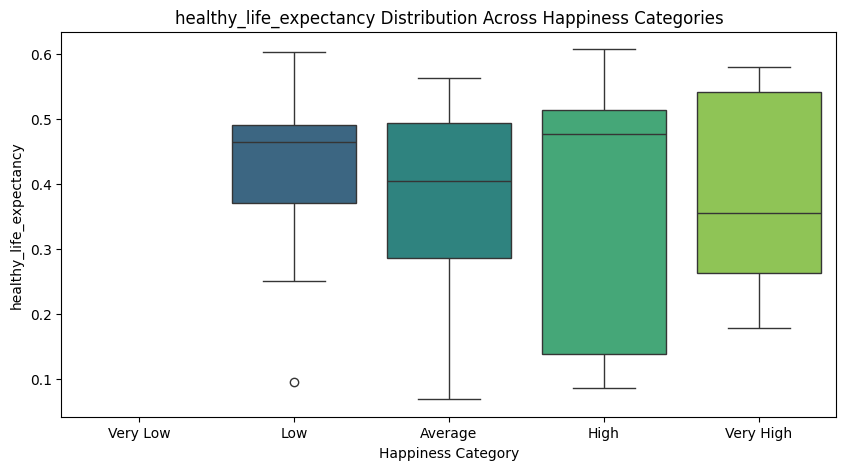

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/3409709949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train_num[feature], palette="viridis")


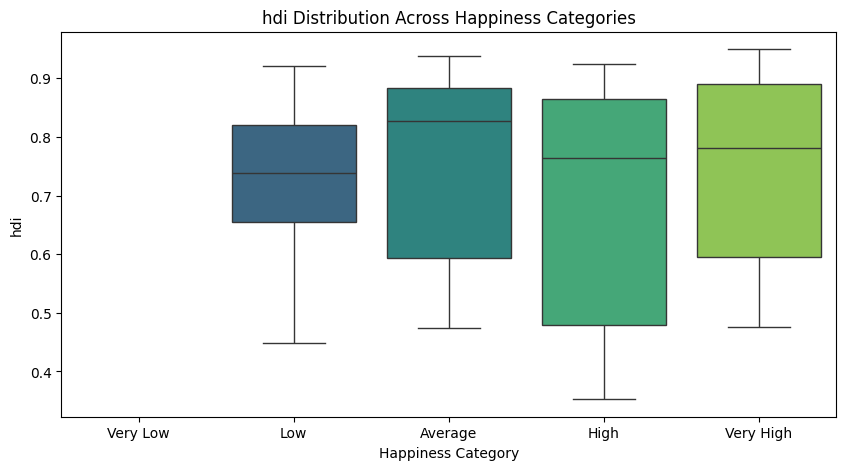

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/3409709949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train_num[feature], palette="viridis")


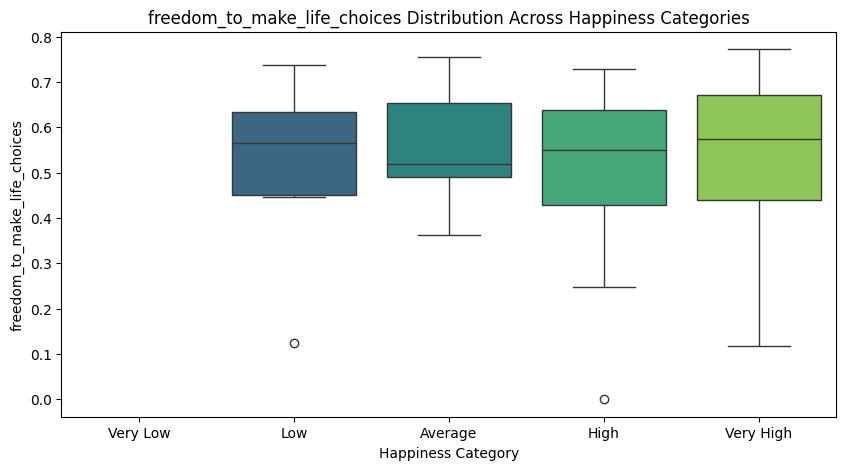

In [19]:
# Boxplots of key numerical features against happiness categories
for feature in key_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=y_train, y=X_train_num[feature], palette="viridis")
    plt.xlabel('Happiness Category')
    plt.ylabel(feature)
    plt.title(f'{feature} Distribution Across Happiness Categories')
    plt.show()

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


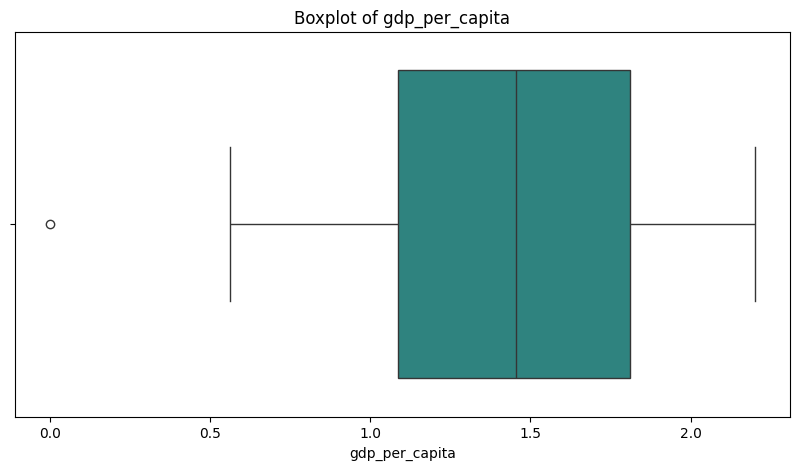

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


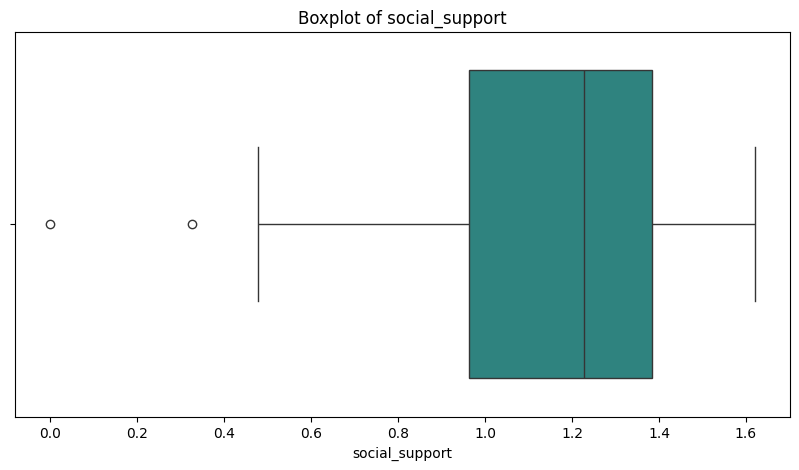

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


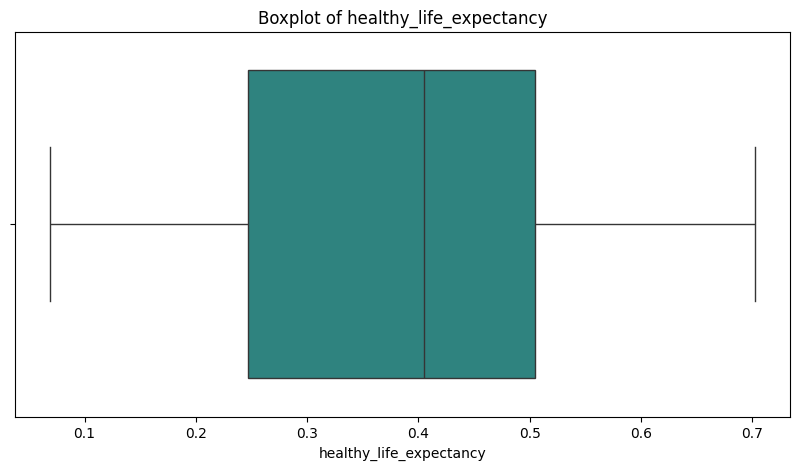

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


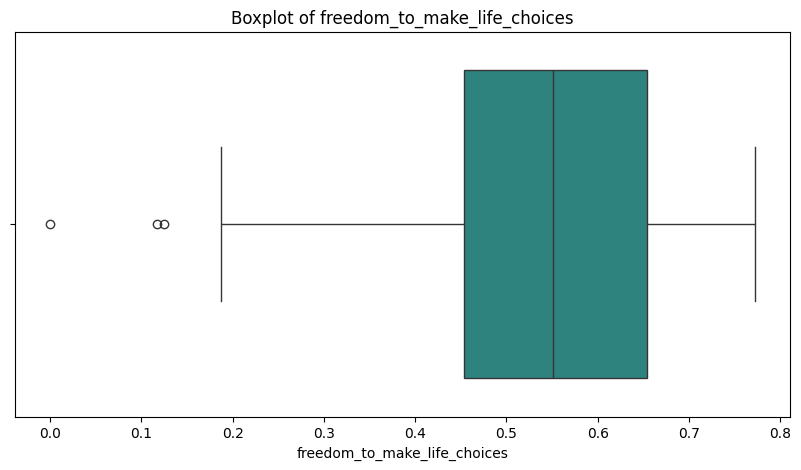

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


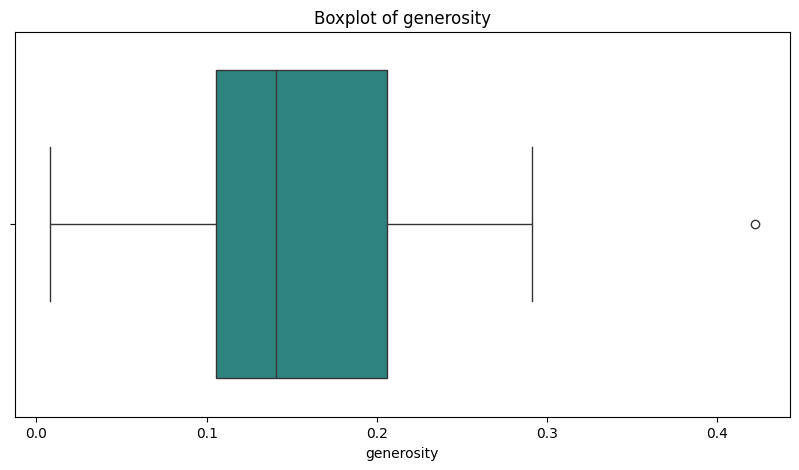

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


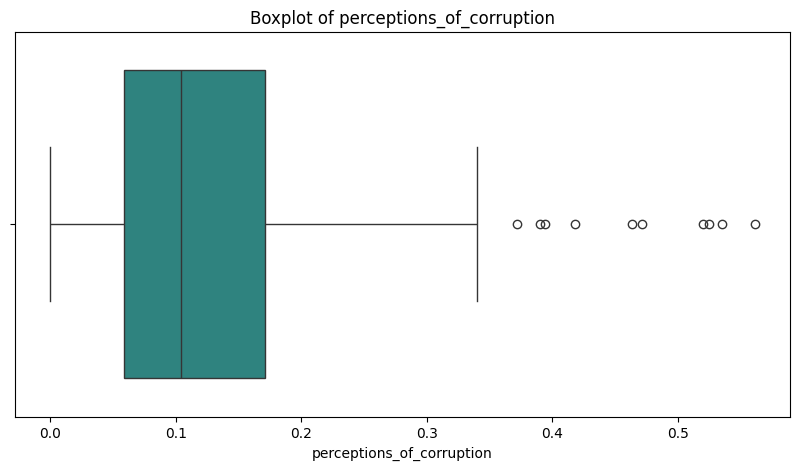

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


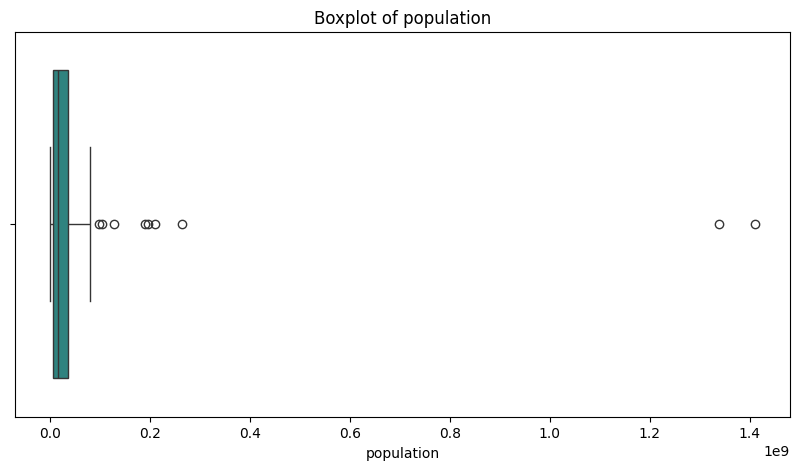

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


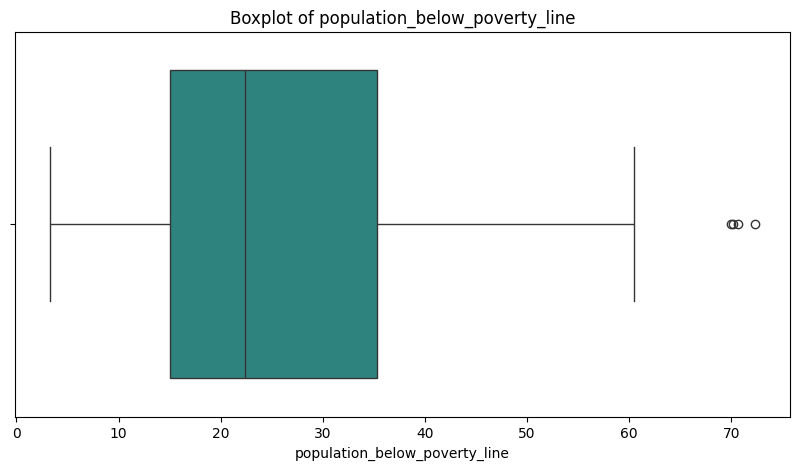

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


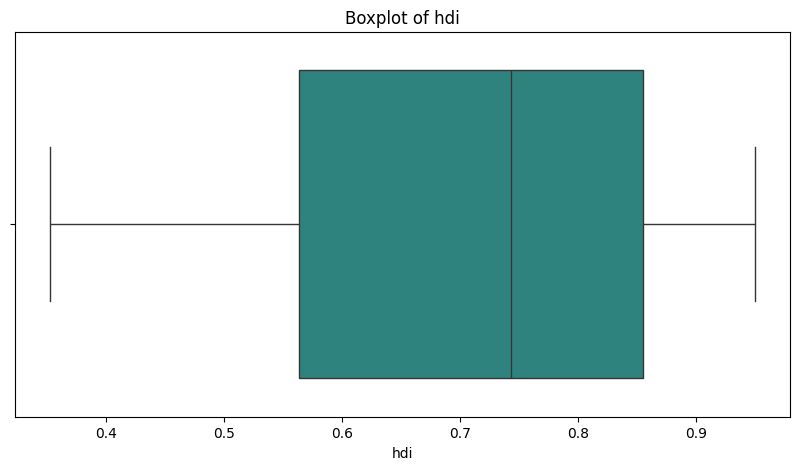

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


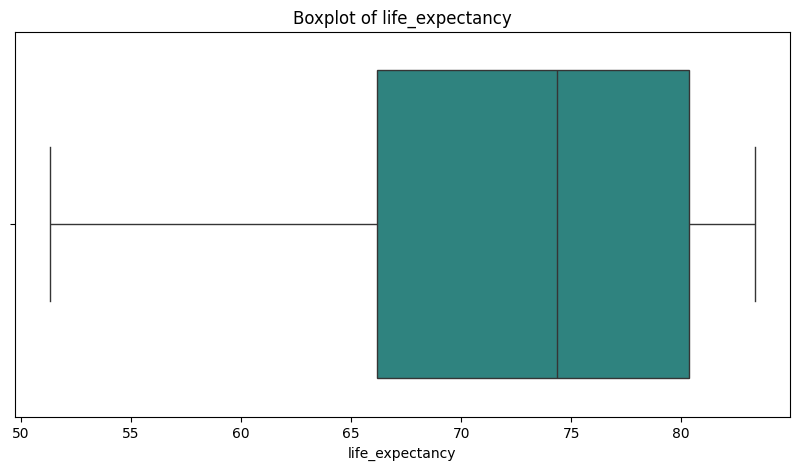

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


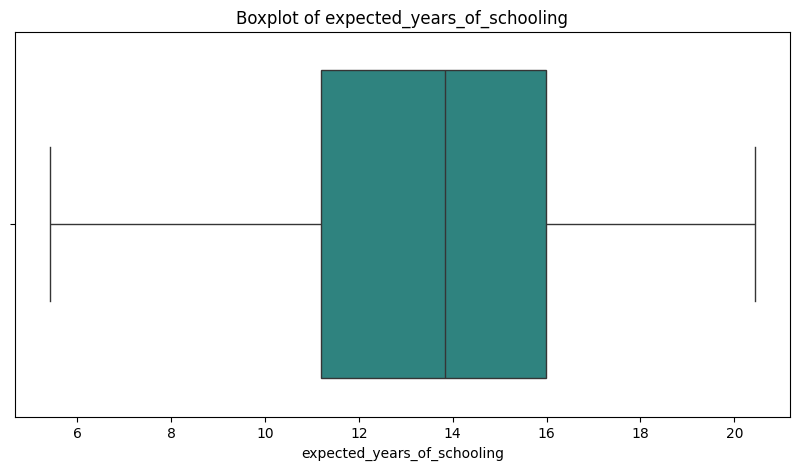

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


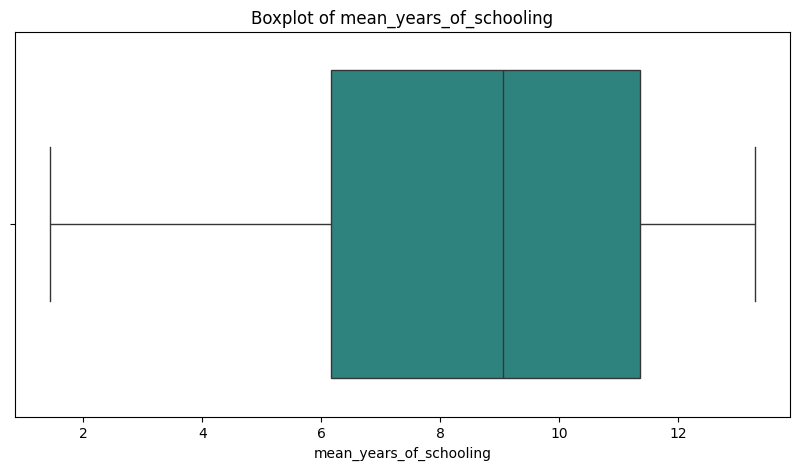

/var/folders/tr/c58snw913f35kxvc8vyzbts80000gn/T/ipykernel_43594/2502988327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train_num[feature], palette="viridis")


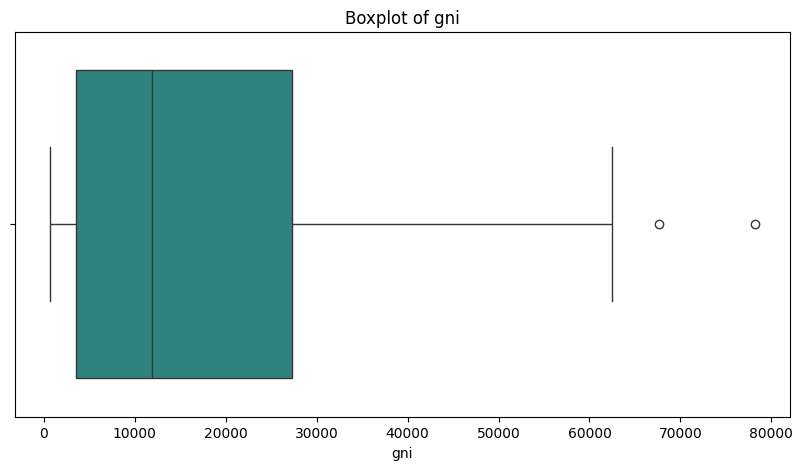

In [20]:
# Your code here:# List of key numerical features to check for outliers
numerical_features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                      'hdi', 'life_expectancy', 'expected_years_of_schooling']

# Plot boxplots for each numerical feature
for feature in X_train_num:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=X_train_num[feature], palette="viridis")
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [21]:
z_scores = np.abs(zscore(X_train_num.select_dtypes(include=['number'])))  # Compute Z-scores
outlier_indices = np.where(z_scores > 3)  # Mark values beyond 3 standard deviations

# Print number of outliers per feature
outlier_counts = (z_scores > 3).sum(axis=0)
print("Number of Outliers Detected (Z-score > 3):")
print(outlier_counts)

Number of Outliers Detected (Z-score > 3):
gdp_per_capita                   1
social_support                   1
healthy_life_expectancy          0
freedom_to_make_life_choices     1
generosity                       1
perceptions_of_corruption        1
population                       0
population_below_poverty_line    0
hdi                              0
life_expectancy                  0
expected_years_of_schooling      0
mean_years_of_schooling          0
gni                              0
dtype: int64


In [22]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)  # First quartile
    Q3 = data[feature].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Compute IQR
    lower_bound = Q1 - 1.5 * IQR  # Lower threshold
    upper_bound = Q3 + 1.5 * IQR  # Upper threshold
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Check for outliers in selected numerical features
for feature in numerical_features:
    outliers = detect_outliers_iqr(X_train_num, feature)
    print(f"Feature: {feature} - Outliers detected: {len(outliers)}")

Feature: gdp_per_capita - Outliers detected: 1
Feature: social_support - Outliers detected: 2
Feature: healthy_life_expectancy - Outliers detected: 0
Feature: hdi - Outliers detected: 0
Feature: life_expectancy - Outliers detected: 0
Feature: expected_years_of_schooling - Outliers detected: 0


Write what you observed and your General comments on what should be done:

In [23]:
# Your comments hereObservations from the Analysis

# 1. Outliers Detected
# 	•	gdp_per_capita: 1 outlier detected.
# 	•	social_support: 2 outliers detected.
# 	•	healthy_life_expectancy, hdi, life_expectancy, expected_years_of_schooling: No outliers detected.
# 	•	Other features (Z-score analysis):
# 	•	Outliers were found in freedom_to_make_life_choices, generosity, perceptions_of_corruption (1 each).
# 	•	Population had a strong negative correlation (-0.232), which might indicate a non-linear relationship.
#
# 2. Feature Correlation with Happiness Category
# 	•	Top positively correlated features:
# 	•	population_below_poverty_line (0.127) – Higher poverty correlates with lower happiness.
# 	•	expected_years_of_schooling (0.075) – More education correlates with higher happiness.
# 	•	social_support (0.048) – More social support aligns with higher happiness.
# 	•	hdi (0.021) & healthy_life_expectancy (0.018) – Indicators of development correlate with happiness.
# 	•	Top negatively correlated features:
# 	•	population (-0.233) – Larger populations may indicate urban stress or economic disparities affecting happiness.
# 	•	mean_years_of_schooling (-0.026) & gni (-0.030) – Possibly indicating wealth inequality effects on happiness.


# General Recommendations
#
# 1. Feature Selection & Engineering
# 	•	Since population_below_poverty_line has the highest correlation with happiness, consider deriving related metrics (e.g., poverty-adjusted GDP).
# 	•	Interaction features: Create new features combining education, social_support, and health to test for synergistic effects on happiness.
# 	•	Feature Scaling: Apply normalization (MinMaxScaler) for features with large scales (e.g., GDP, population).
#
# 2. Model Considerations
# 	•	Given the low correlation of most individual features, a tree-based model (Random Forest, XGBoost) may help capture non-linear relationships better than linear models.
# 	•	Consider Principal Component Analysis (PCA) to reduce dimensionality and detect latent patterns in correlated features.


## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

Skewness of Numerical Features:
 population                       6.058979
perceptions_of_corruption        1.600420
gni                              1.270302
population_below_poverty_line    1.074529
generosity                       0.555203
expected_years_of_schooling     -0.206557
healthy_life_expectancy         -0.367545
mean_years_of_schooling         -0.437315
hdi                             -0.453412
gdp_per_capita                  -0.547790
life_expectancy                 -0.632233
social_support                  -0.954425
freedom_to_make_life_choices    -0.970893
dtype: float64
Applied log transformation to: ['population', 'perceptions_of_corruption', 'gni', 'population_below_poverty_line']


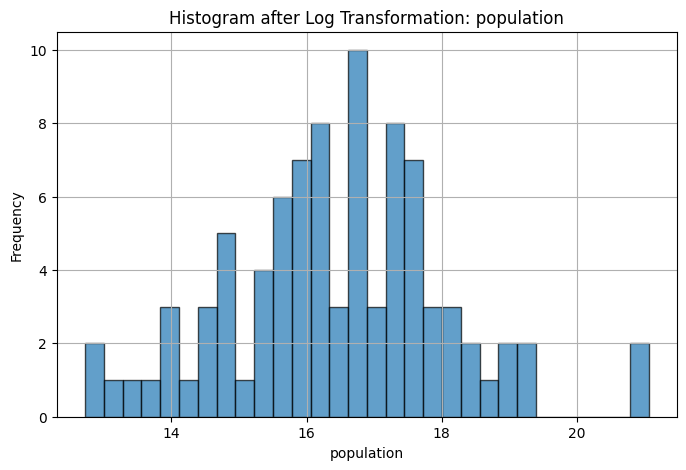

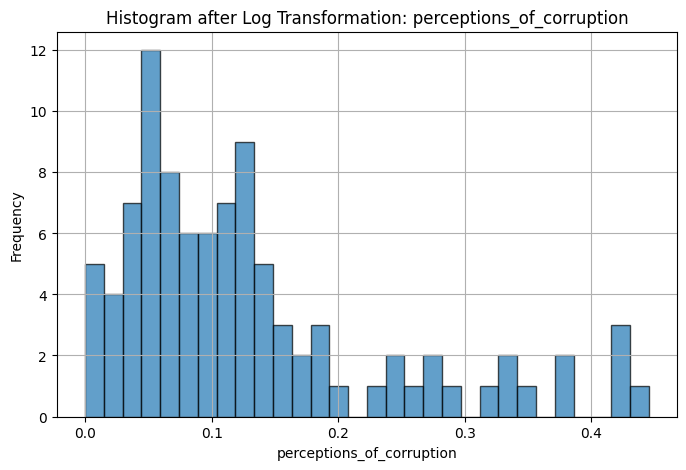

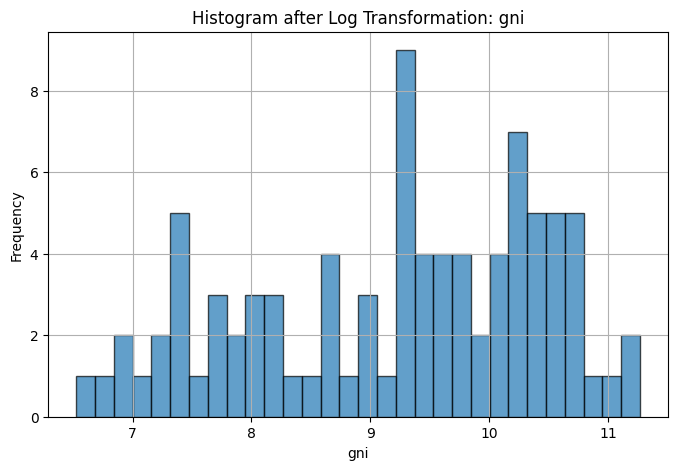

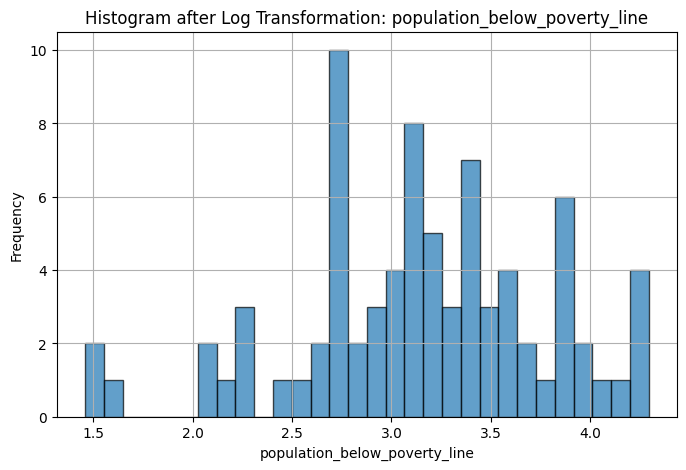

In [24]:
# Your code here:

# Check skewness of numerical features
skewed_features = X_train.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewness of Numerical Features:\n", skewed_features)

# Select features with high skewness (typically >1 or <-1)
highly_skewed_features = skewed_features[abs(skewed_features) > 1].index.tolist()

# Apply log1p transformation
X_train[highly_skewed_features] = np.log1p(X_train[highly_skewed_features])
X_test[highly_skewed_features] = np.log1p(X_test[highly_skewed_features])

print(f"Applied log transformation to: {highly_skewed_features}")

# Plot transformed features
for feature in highly_skewed_features:
    plt.figure(figsize=(8, 5))
    plt.hist(X_train[feature], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram after Log Transformation: {feature}')
    plt.grid(True)
    plt.show()

Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

Skewness of Numerical Features:
 perceptions_of_corruption        1.393357
generosity                       0.555203
population                       0.172724
expected_years_of_schooling     -0.206557
healthy_life_expectancy         -0.367545
gni                             -0.414228
population_below_poverty_line   -0.436395
mean_years_of_schooling         -0.437315
hdi                             -0.453412
gdp_per_capita                  -0.547790
life_expectancy                 -0.632233
social_support                  -0.954425
freedom_to_make_life_choices    -0.970893
dtype: float64
Applied log transformation to: ['perceptions_of_corruption']
Created new interaction feature: gdp_support_interaction


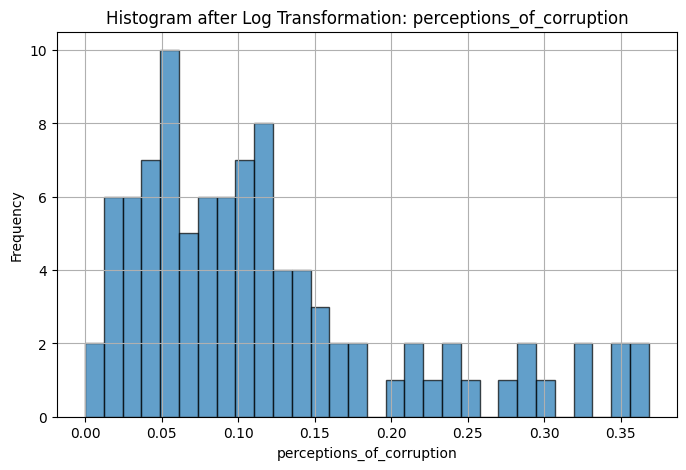

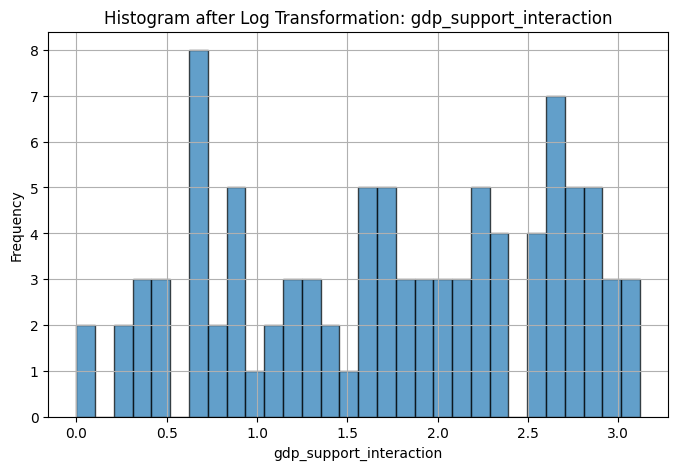

In [25]:
# Your code here:
#
# Check skewness of numerical features
skewed_features = X_train.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewness of Numerical Features:\n", skewed_features)

# Select features with high skewness (typically >1 or <-1)
highly_skewed_features = skewed_features[abs(skewed_features) > 1].index.tolist()

# Apply log1p transformation
X_train[highly_skewed_features] = np.log1p(X_train[highly_skewed_features])
X_test[highly_skewed_features] = np.log1p(X_test[highly_skewed_features])

print(f"Applied log transformation to: {highly_skewed_features}")

# Create an interaction feature (Example: GDP per Capita × Social Support)
X_train["gdp_support_interaction"] = X_train["gdp_per_capita"] * X_train["social_support"]
X_test["gdp_support_interaction"] = X_test["gdp_per_capita"] * X_test["social_support"]

print("Created new interaction feature: gdp_support_interaction")

# Plot transformed features
for feature in highly_skewed_features + ["gdp_support_interaction"]:
    plt.figure(figsize=(8, 5))
    plt.hist(X_train[feature], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram after Log Transformation: {feature}')
    plt.grid(True)
    plt.show()

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=['number'])

numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Use median to avoid the extreme value's effect
    ('scaler', StandardScaler())])  # avoid the extreme value's effect

categorical_features = ['country']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',  SimpleImputer(strategy='most_frequent' )),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore' ))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [27]:
print("Columns in X_train:", X_train.columns.tolist())

Columns in X_train: ['country', 'region', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'population', 'population_below_poverty_line', 'hdi', 'life_expectancy', 'expected_years_of_schooling', 'mean_years_of_schooling', 'gni', 'gdp_support_interaction']


Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [28]:
## Your answer :
#
# 1. Identify Numerical and Categorical Features
#
# 	•	We separate numerical and categorical features because they require different preprocessing techniques.
# 	•	numeric_features: Extracts all numerical columns.
# 	•	categorical_features: Manually defined because these are string-based categorical values.
#
# 2. Define the Numerical Transformer
# What is happening?
# 	•	Step 1: Handle Missing Values
# 	•	Originally, missing numerical values were filled with 0, but we changed it to median (strategy='median').
# 	•	Why?
# 	•	The median is less affected by outliers compared to the mean.
# 	•	If a feature has extreme values (e.g., GDP per capita, income), the mean could be misleading.
# 	•	Using median ensures a more robust filling strategy.
# 	•	Step 2: Standardize Numerical Data
# 	•	StandardScaler() transforms each feature to have:
# 	•	Mean = 0
# 	•	Standard deviation = 1
# 	•	Why?
# 	•	Many machine learning algorithms (e.g., linear models, neural networks) perform better with normalized data.
# 	•	Ensures features with different scales (e.g., GDP per capita vs. population) do not dominate the learning process.
#
# 3. Define the Categorical Transformer
#
# What is happening?
# 	•	Step 1: Handle Missing Values
# 	•	Using most_frequent (mode) to fill missing categorical values.
# 	•	Why?
# 	•	Unlike numerical data, categorical data has no “mean” or “median.”
# 	•	Replacing missing values with the most common category ensures the dataset remains consistent.
# 	•	Step 2: One-Hot Encoding
# 	•	OneHotEncoder(handle_unknown='ignore') converts categorical values into binary columns (dummy variables).
# 	•	Why?
# 	•	Machine learning models cannot process text directly.
# 	•	One-hot encoding allows categorical variables to be represented as numerical features.
# 	•	handle_unknown='ignore' prevents errors if new unseen categories appear in test data.
#
# 4. Combine Both Transformers into a Preprocessing Pipeline
#
# What is happening?
# 	•	The ColumnTransformer applies different preprocessing steps:
# 	•	('num', numeric_transformer, numeric_features): Applies numerical transformation.
# 	•	('cat', categorical_transformer, categorical_features): Applies categorical transformation.
# 	•	Ensures that numerical and categorical features are preprocessed separately before training.
#
# 5. Fit the Preprocessor to Training Data
#
# 	•	This learns how to transform the data:
# 	•	Finds the median for numerical features.
# 	•	Finds the most frequent category for categorical features.
# 	•	Learns how to scale and encode all features.
# 	•	This step is critical before applying the transformations to X_train and X_test.

In [29]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [30]:
# ## Your Answer :
#
# 1. preprocessor (Object)
# What is it?
# 	•	preprocessor is a ColumnTransformer object.
# 	•	It defines the blueprint for preprocessing:
# 	•	How numerical features should be imputed and scaled.
# 	•	How categorical features should be imputed and encoded.
# 	•	At this stage, preprocessor is NOT yet fitted to any data.
#
# 2. preprocess (Object)
# What is it?
# 	•	preprocessor is a ColumnTransformer object.
# 	•	It defines the blueprint for preprocessing:
# 	•	How numerical features should be imputed and scaled.
# 	•	How categorical features should be imputed and encoded.
# 	•	At this stage, preprocessor is NOT yet fitted to any data.
#
# 3.preprocessor(data) (Function)
#
# What is it?
# 	•	preprocessor here is a Python function (conflicts with the preprocessor object name).
# 	•	Takes data as input and:
# 	1.	Drops country and region from the dataset.
# 	2.	Applies the fitted preprocess object to transform the data.
# 	3.	Returns the transformed dataset (preprocessed_data).
#
# 4.preprocessed_data (Returned Output)
#
# What is it?
# 	•	The final transformed dataset (returned by the function).
# 	•	Typically a NumPy array or sparse matrix, depending on the encoding method.
# 	•	Contents:
# 	•	Numerical features to Scaled using StandardScaler.
# 	•	Categorical features to Converted to One-Hot Encoding.
# 	•	No missing values to Already imputed.

In [31]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(95, 109)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Define the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Transform training and testing data
X_train_transformed = preprocess.transform(X_train)
X_test_transformed = preprocess.transform(X_test)

# Fit the model on the transformed training data
model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_transformed)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Your cell should have a score between 0-1 as output

Model Accuracy: 0.5714


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


Model Accuracy: 0.5714

Classification Report:
              precision    recall  f1-score   support

     Average       0.60      0.75      0.67         8
        High       0.67      0.75      0.71         8
         Low       0.30      0.38      0.33         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.50      0.33      0.40         9

    accuracy                           0.57        42
   macro avg       0.58      0.57      0.57        42
weighted avg       0.59      0.57      0.57        42



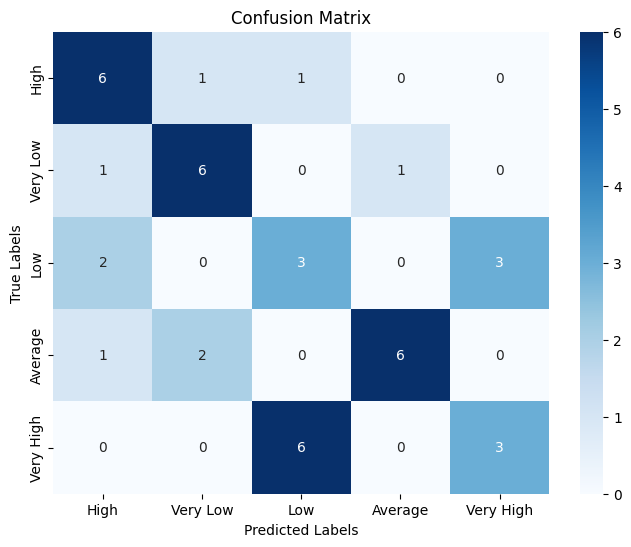

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels

# Ensure `X_test` is transformed correctly
X_test_transformed = preprocess.transform(X_test)

# Generate predicted labels
prediction_labels = model.predict(X_test_transformed)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction_labels)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## 6. Repeat the process with different parameters to improve the accuracy


Model 2 Accuracy: 0.5714

Model 2 Classification Report:
              precision    recall  f1-score   support

     Average       0.67      0.75      0.71         8
        High       0.56      0.62      0.59         8
         Low       0.40      0.50      0.44         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.43      0.33      0.38         9

    accuracy                           0.57        42
   macro avg       0.58      0.57      0.57        42
weighted avg       0.58      0.57      0.57        42



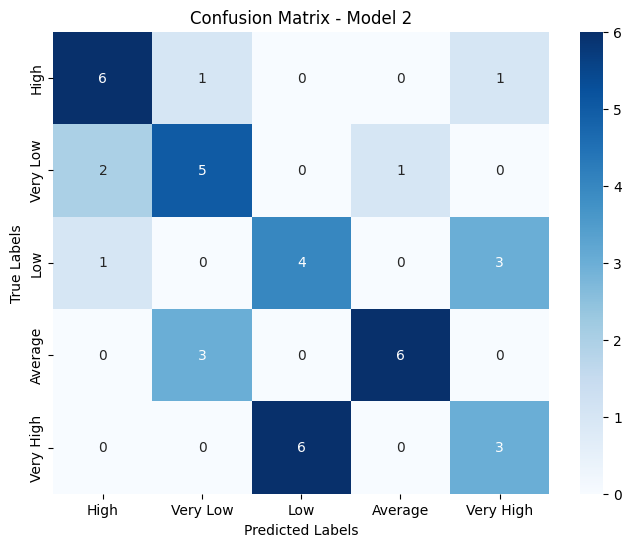

In [34]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

# Define a new Random Forest model with optimized hyperparameters
model_2 = RandomForestClassifier(
    n_estimators=200,          # Increase number of trees for better learning
    max_depth=20,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Require at least 5 samples to split a node
    min_samples_leaf=2,        # Require at least 2 samples in leaf nodes
    max_features='sqrt',       # Use the square root of total features per split
    random_state=42,
    n_jobs=-1                  # Use all processors for faster training
)

# Train model 2 on the same preprocessed data
X_train_transformed = preprocess.transform(X_train)
X_test_transformed = preprocess.transform(X_test)

model_2.fit(X_train_transformed, y_train)

# Generate predictions
prediction_labels_2 = model_2.predict(X_test_transformed)

# Evaluate model performance
accuracy_2 = accuracy_score(y_test, prediction_labels_2)
print(f"Model 2 Accuracy: {accuracy_2:.4f}")

# Classification report
print("\nModel 2 Classification Report:")
print(classification_report(y_test, prediction_labels_2))

# Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test, prediction_labels_2)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_2, annot=True, cmap='Blues', fmt='d', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Model 2")
plt.show()

 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [35]:
# ## Your answer :
# # 1.⃣ n_estimators=200 (More Trees)
# 	•	Increases the number of trees from 100 to 200.
# 	•	Why? More trees reduce variance and make predictions more stable.
# 	•	Impact: Better generalization, reducing model fluctuations.
#
# 2. max_depth=20 (Limit Tree Depth)
# 	•	Instead of allowing trees to grow until pure, we limit them to depth 20.
# 	•	Why? Prevents overfitting by stopping trees from becoming too complex.
# 	•	Impact: Balances bias and variance, making the model more robust.
#
# 3. min_samples_split=5 (Larger Split Requirement)
# 	•	Requires at least 5 samples before a node can split (instead of 2).
# 	•	Why? Reduces overfitting by preventing the model from splitting on small fluctuations.
# 	•	Impact: The model generalizes better to unseen data.
#
# 4.⃣ min_samples_leaf=2 (Larger Leaf Nodes)
# 	•	Ensures that each leaf node has at least 2 samples.
# 	•	Why? Avoids creating deep branches with just 1 sample, which can overfit.
# 	•	Impact: Makes trees more stable and reduces noise.
#
# 5. max_features='sqrt' (Random Feature Selection)
# 	•	At each split, the model chooses a random subset of features.
# 	•	Why? Reduces correlation between trees, making the ensemble stronger.
# 	•	Impact: Lessens overfitting and increases model diversity.
#
# 6. n_jobs=-1 (Parallel Processing)
# 	•	Uses all CPU cores for faster training.
# 	•	Why? Makes training significantly faster, especially with n_estimators=200.

Model 2 Accuracy: 0.5714

Model 2 Classification Report:
              precision    recall  f1-score   support

     Average       0.67      0.75      0.71         8
        High       0.56      0.62      0.59         8
         Low       0.40      0.50      0.44         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.43      0.33      0.38         9

    accuracy                           0.57        42
   macro avg       0.58      0.57      0.57        42
weighted avg       0.58      0.57      0.57        42



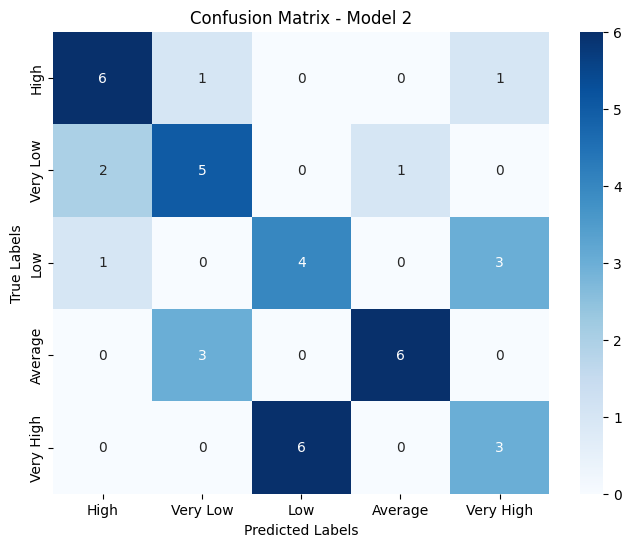

In [36]:
#Evaluate Model 2:

# Generate predictions
prediction_labels_2 = model_2.predict(X_test_transformed)

# Evaluate model performance
accuracy_2 = accuracy_score(y_test, prediction_labels_2)
print(f"Model 2 Accuracy: {accuracy_2:.4f}")

# Classification report
print("\nModel 2 Classification Report:")
print(classification_report(y_test, prediction_labels_2))

# Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test, prediction_labels_2)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_2, annot=True, cmap='Blues', fmt='d', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Model 2")
plt.show()

Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [37]:
## Your answer:
#
# No, it is not worth making more manual changes, as it is inefficient and time-consuming. Instead of randomly trying different values, we should use GridSearchCV, which systematically searches for the best hyperparameters using cross-validation. This ensures we find the optimal combination efficiently and objectively, rather than relying on trial and error.

In [38]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [10, 20, None],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required in a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
}

# Create the base model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform grid search with cross-validation
gridmodel = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',    # Optimize for accuracy
    n_jobs=-1,            # Use all processors for faster search
    verbose=1
)

# Fit GridSearchCV to the preprocessed training data
gridmodel.fit(X_train_transformed, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
best mean cross-validation score: 0.579
best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


gridmodel Accuracy (Tuned): 0.5714

 gridmodel Classification Report:
              precision    recall  f1-score   support

     Average       0.60      0.75      0.67         8
        High       0.67      0.75      0.71         8
         Low       0.30      0.38      0.33         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.50      0.33      0.40         9

    accuracy                           0.57        42
   macro avg       0.58      0.57      0.57        42
weighted avg       0.59      0.57      0.57        42



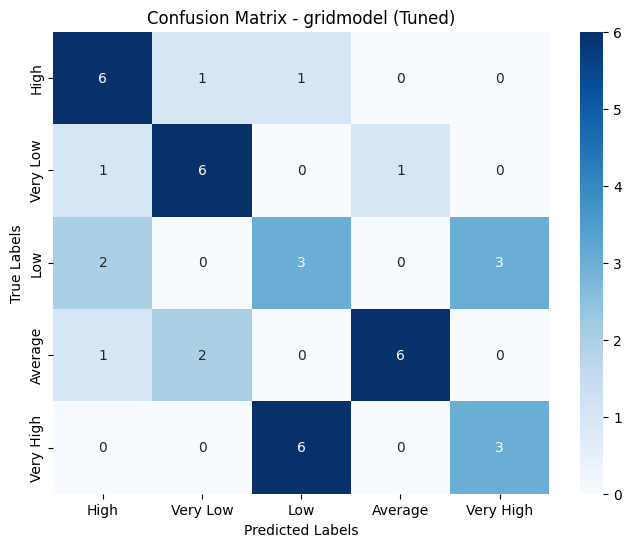

In [39]:
#Submit gridmodel：

#-- Generate predicted values
prediction_labels_gridmodel = gridmodel.predict(X_test_transformed)

# Evaluate model accuracy
accuracy_gridmodel = accuracy_score(y_test, prediction_labels_gridmodel)
print(f"gridmodel Accuracy (Tuned): {accuracy_gridmodel:.4f}")

# Classification Report
print("\n gridmodel Classification Report:")
print(classification_report(y_test, prediction_labels_gridmodel))

# Confusion Matrix
conf_matrix_gridmodel = confusion_matrix(y_test, prediction_labels_gridmodel)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_gridmodel, annot=True, cmap='Blues', fmt='d', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - gridmodel (Tuned)")
plt.show()


Gradient Boosting Accuracy: 0.4524
              precision    recall  f1-score   support

     Average       0.38      0.62      0.48         8
        High       0.57      0.50      0.53         8
         Low       0.12      0.12      0.12         8
   Very High       1.00      0.56      0.71         9
    Very Low       0.44      0.44      0.44         9

    accuracy                           0.45        42
   macro avg       0.51      0.45      0.46        42
weighted avg       0.52      0.45      0.46        42



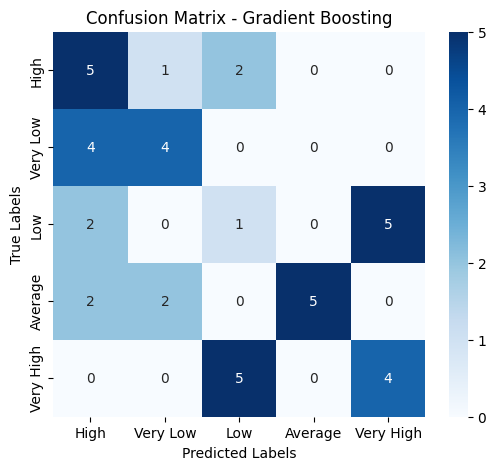


Bagging Classifier Accuracy: 0.4762
              precision    recall  f1-score   support

     Average       0.38      0.62      0.48         8
        High       0.60      0.38      0.46         8
         Low       0.25      0.25      0.25         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.44      0.44      0.44         9

    accuracy                           0.48        42
   macro avg       0.51      0.47      0.48        42
weighted avg       0.51      0.48      0.48        42



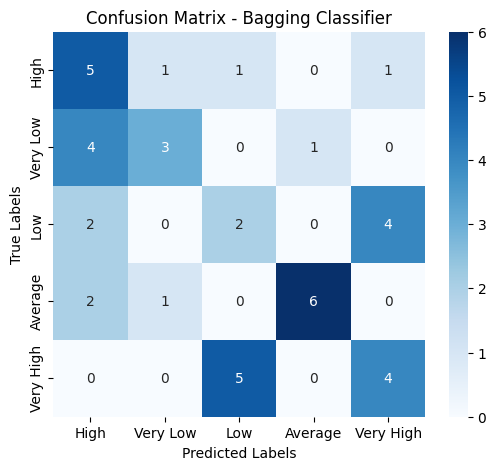


KNN Accuracy: 0.5714
              precision    recall  f1-score   support

     Average       0.44      0.88      0.58         8
        High       0.60      0.75      0.67         8
         Low       0.40      0.25      0.31         8
   Very High       1.00      0.56      0.71         9
    Very Low       0.67      0.44      0.53         9

    accuracy                           0.57        42
   macro avg       0.62      0.57      0.56        42
weighted avg       0.63      0.57      0.56        42



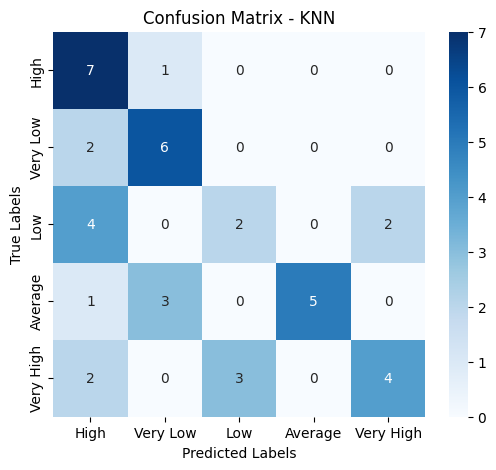


SVC Accuracy: 0.5952
              precision    recall  f1-score   support

     Average       0.58      0.88      0.70         8
        High       0.50      0.62      0.56         8
         Low       0.43      0.38      0.40         8
   Very High       1.00      0.56      0.71         9
    Very Low       0.62      0.56      0.59         9

    accuracy                           0.60        42
   macro avg       0.63      0.60      0.59        42
weighted avg       0.64      0.60      0.59        42



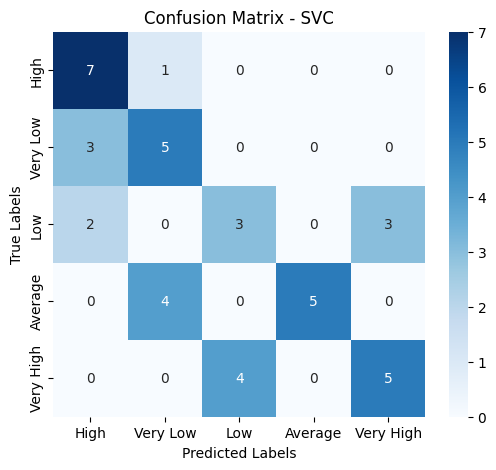


Model Comparison:
Gradient Boosting: 0.4524
Bagging Classifier: 0.4762
KNN: 0.5714
SVC: 0.5952


In [40]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Define models
models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
    "Bagging Classifier": BaggingClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVC": SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Fit model
    model.fit(X_train_transformed, y_train)

    # Predict
    y_pred = model.predict(X_test_transformed)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Compare results
print("\nModel Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [41]:
## Your answer:

# GradientBoostingClassifier	n_estimators=200, learning_rate=0.1, max_depth=3	Boosting trees sequentially, learning from mistakes.
# BaggingClassifier	n_estimators=100	Uses multiple base models (Random Forest-like) to reduce variance.
# KNN (K-Nearest Neighbors)	n_neighbors=5	Uses 5 nearest neighbors for classification.
# SVC (Support Vector Classifier)	kernel='rbf', C=1.0, gamma='scale'	Uses an RBF kernel for non-linear decision boundaries.
#
# What worked best?
# 	1.	KNN & SVC Performed Best (KNN: 0.5714 and SVC: 0.5952 Accuracy)
# 	•	Why?
# 	•	Both models capture non-linear relationships between features.
# 	•	KNN: Classifies based on proximity, which may work well when data points have cluster-like distributions.
# 	•	SVC: The RBF kernel helps capture complex decision boundaries.
# 	•	Takeaway: The dataset likely benefits from non-linear classification approaches rather than tree-based models.
# GradientBoostingClassifier performed the worst (0.4524) because it is sensitive to overfitting with small datasets, and the learning rate may not have been optimal.
#

## 7. Basic Deep Learning

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical


# Ensure y_train is one-hot encoded
num_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train_labels, num_classes=num_classes)

y_test_labels = y_test.astype('category').cat.codes
y_test_one_hot = to_categorical(y_test_labels, num_classes=num_classes)
# Feature and output sizes
feature_count = X_train_transformed.shape[1]  # Ensure it matches preprocessed data
output_neurons = num_classes

In [50]:
# Define a simpler model (3 layers instead of 5)
keras_model = Sequential([
    Dense(64, input_shape=(feature_count,), activation='relu'),  # Fewer neurons
    Dense(32, activation='relu'),
    Dense(output_neurons, activation='softmax')  # Output layer
])

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with fewer epochs
history = keras_model.fit(
    preprocessor(X_train), y_train_one_hot,
    batch_size=16,  # Reduce batch size
    epochs=50,  # Fewer epochs
    validation_split=0.2  # 20% validation
)

# Model summary
keras_model.summary()

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1472 - loss: 1.6757 - val_accuracy: 0.1579 - val_loss: 1.6796
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2441 - loss: 1.5427 - val_accuracy: 0.2105 - val_loss: 1.6392
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4912 - loss: 1.3990 - val_accuracy: 0.2105 - val_loss: 1.6098
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5354 - loss: 1.2963 - val_accuracy: 0.2105 - val_loss: 1.5908
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4669 - loss: 1.2275 - val_accuracy: 0.2105 - val_loss: 1.5746
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4774 - loss: 1.2069 - val_accuracy: 0.2105 - val_loss: 1.5623
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4514 - loss: 1.1488 - val_accuracy: 0.1579 - val_loss: 1.5587
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4957 - loss: 1.1052 - val_accuracy: 0.1579 - val_loss: 1.5563


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,857 (108.82 KB)

 Trainable params: 9,285 (36.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,572 (72.55 KB)

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [44]:
# ## Your answer:
# In our working code, we used ReLU (Rectified Linear Unit) activation in the middle layers
# Why Use Softmax?
# Converts Raw Scores into Probabilities

# Softmax transforms raw output values into a probability distribution, where each class gets a probability between 0 and 1, and their sum equals 1.
# Multi-Class Classification Requirement

# Since our problem is multi-class classification, softmax ensures that the model outputs a probability for each class, making it easier to interpret.
# Works Well with categorical_crossentropy Loss

# Softmax pairs well with categorical cross-entropy, which measures how far the predicted probability distribution is from the true labels.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [45]:
# ## Your answer:
# No, training for 300 epochs is generally not a good idea unless:

# We have a large dataset that requires extensive training.
# Our model is not overfitting, meaning validation loss continues to improve.
# The training loss is still decreasing significantly after many epochs.

# Should You Train a Bit More?
# Not necessarily. Instead of arbitrarily increasing epochs, a better approach is to:

# Monitor Training Progress with Early Stopping

# Use EarlyStopping to stop training when the validation loss stops improving

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [46]:
# ## Your answer:
# Why is loss='categorical_crossentropy' Used?
# Our model is performing multi-class classification, meaning the output layer has multiple classes with one-hot encoded labels.

# Why Was optimizer='sgd' Used?
# SGD (Stochastic Gradient Descent) is a basic optimizer that updates weights after each batch.

# Adam is a better default choice because:

# It automatically adjusts the learning rate for each weight.
# It converges faster compared to vanilla SGD.
# Works well even with minimal tuning (SGD requires careful learning rate tuning).

Can you try getting the model's training history out and plotting the curves?

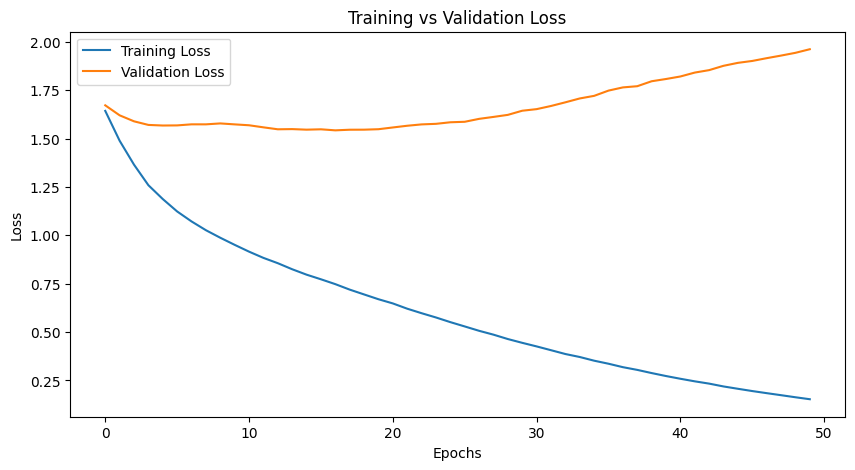

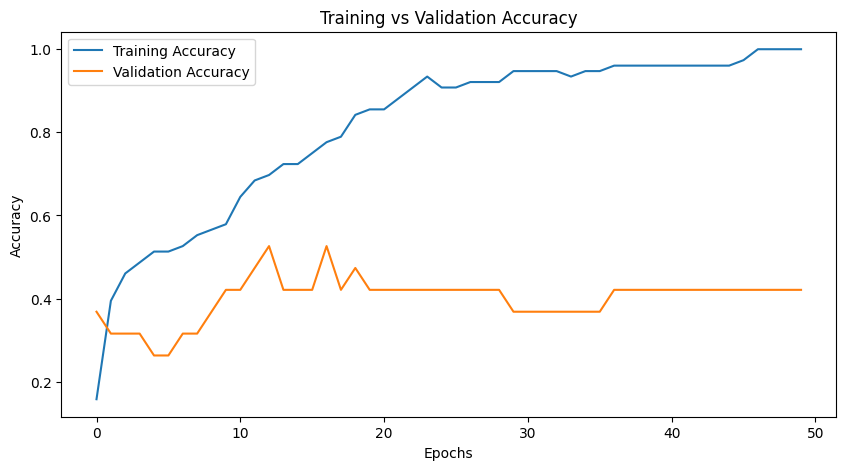

In [47]:
import matplotlib.pyplot as plt

# Extract training history
history_dict = history.history

# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Model Accuracy: 0.8737

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        19
           1       0.85      0.89      0.87        19
           2       0.93      0.74      0.82        19
           3       0.82      0.95      0.88        19
           4       0.95      0.95      0.95        19

    accuracy                           0.87        95
   macro avg       0.88      0.87      0.87        95
weighted avg       0.88      0.87      0.87        95



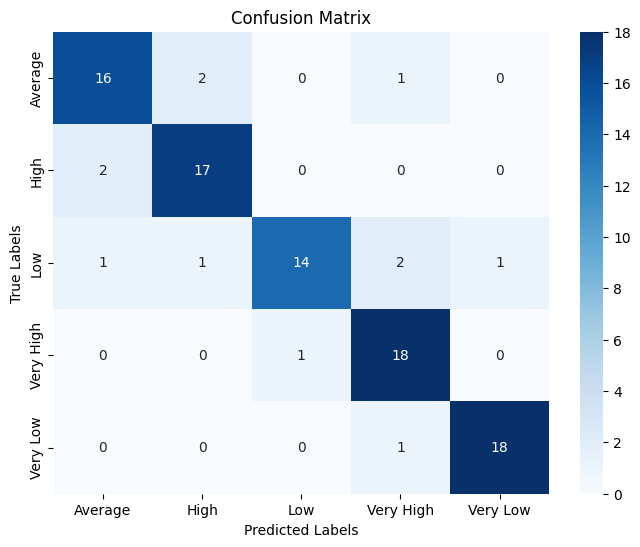

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Find the catagories of the target variable
le = LabelEncoder()
y_train_labels = le.fit_transform(y_train)

# 3. covert to DataFrame
y_train_one_hot_df = pd.DataFrame(
    y_train_one_hot,
    columns=le.classes_  
)
#-- Generate predicted y values
y_pred_prob = keras_model.predict(X_train_transformed)

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index = np.argmax(y_pred_prob, axis=1)

# extract correct prediction labels
prediction_labels = [y_train_one_hot_df.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels
# Convert y_test_one_hot back to class labels
true_labels = np.argmax(y_train_one_hot_df, axis=1)

# Compute accuracy
accuracy = accuracy_score(true_labels, prediction_column_index)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(true_labels, prediction_column_index))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, prediction_column_index)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

Epoch 1/50


/Users/zhaotiantian/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.1617 - loss: 2.4684 - val_accuracy: 0.2222 - val_loss: 1.6142
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1461 - loss: 2.4521 - val_accuracy: 0.2222 - val_loss: 1.6131
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2232 - loss: 2.3418 - val_accuracy: 0.1111 - val_loss: 1.6105
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1690 - loss: 2.0927 - val_accuracy: 0.1111 - val_loss: 1.6080
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1920 - loss: 2.1332 - val_accuracy: 0.0000e+00 - val_loss: 1.6058
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1842 - loss: 2.0382 - val_accuracy: 0.0000e+00 - val_loss: 1.6034
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4465 - loss: 1.7146 - val_accuracy: 0.0000e+00 - val_loss: 1.6016
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3923 - loss: 1.7347 - val_accuracy: 0.0000e+00 - val_loss: 1.

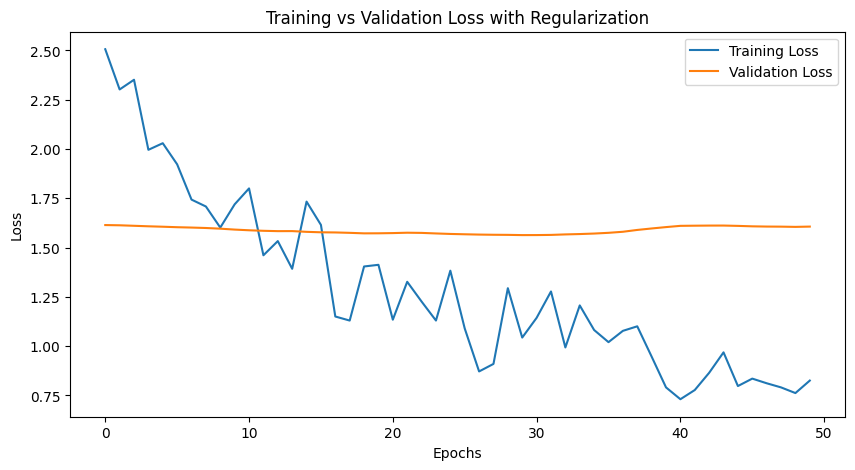

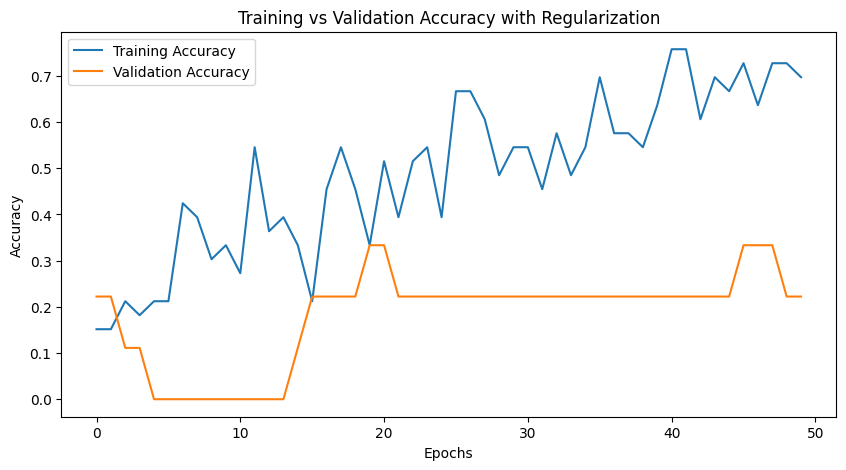

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1632 - loss: 1.8570

Test Loss: 1.8388
Test Accuracy: 0.1667


In [76]:
# Your code here:
from keras.layers import Dropout, BatchNormalization

# Define a neural network model with Dropout and Batch Normalization
keras_model_reg = Sequential([
    Dense(64, input_shape=(feature_count,), activation='relu'),
    BatchNormalization(),  # Normalize activations for stable training
    Dropout(0.3),  # Dropout to prevent overfitting

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(output_neurons, activation='softmax')  # Output layer for classification
])

# Compile model
keras_model_reg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with dropout and batch normalization
history_reg = keras_model_reg.fit(
    X_test_transformed, y_train_one_hot,
    batch_size=16,
    epochs=50,
    validation_split=0.2
)

# Extract training history
history_dict = history_reg.history

# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss with Regularization')
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy with Regularization')
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = keras_model_reg.evaluate(X_test_transformed, y_test_one_hot)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
# Your comments about the change in performance

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.


Training with activation function: relu


/Users/zhaotiantian/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


relu - Test Accuracy: 0.2619, Test Loss: 1.7543

Training with activation function: leaky_relu


/Users/zhaotiantian/Library/Python/3.9/lib/python/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


leaky_relu - Test Accuracy: 0.1905, Test Loss: 1.9254

Training with activation function: tanh
tanh - Test Accuracy: 0.2619, Test Loss: 1.8295

Training with activation function: sigmoid
sigmoid - Test Accuracy: 0.0476, Test Loss: 1.6113


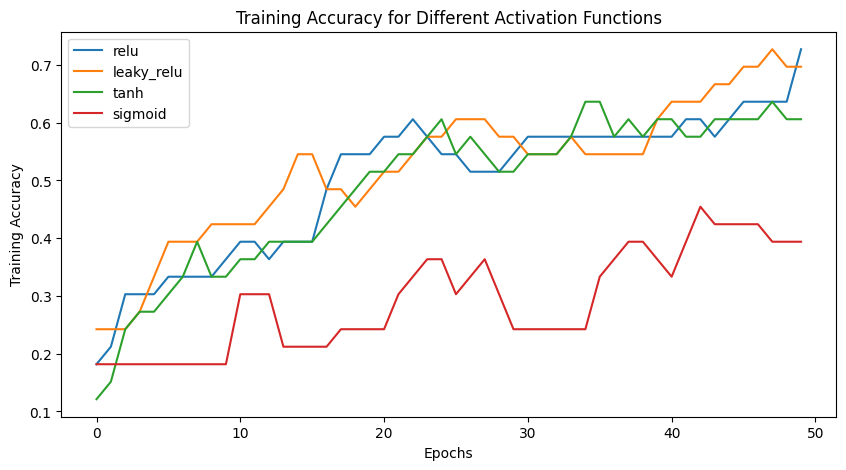

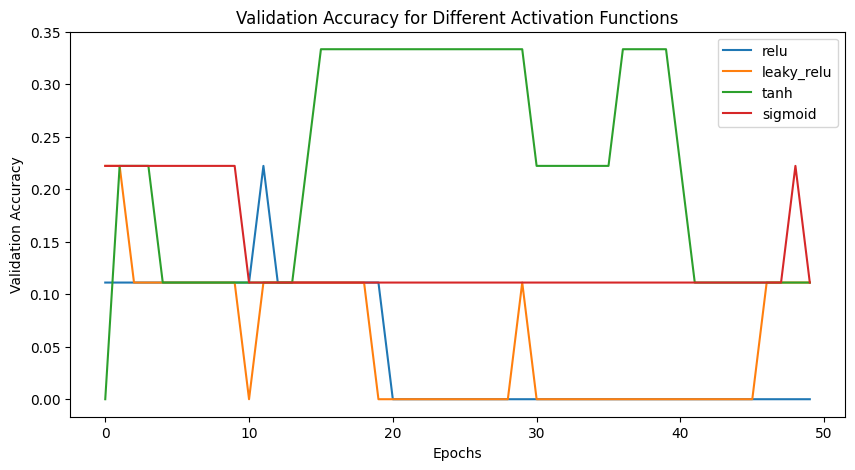

In [78]:
# Your code here:
from keras.layers import LeakyReLU

# Define a function to create models with different activation functions
def build_model(activation_function):
    model = Sequential([
        Dense(64, input_shape=(feature_count,)),
        Activation(activation_function) if activation_function != 'leaky_relu' else LeakyReLU(alpha=0.01),

        Dense(32),
        Activation(activation_function) if activation_function != 'leaky_relu' else LeakyReLU(alpha=0.01),

        Dense(output_neurons, activation='softmax')  # Output layer
    ])
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# List of activation functions to test
activations = ['relu', 'leaky_relu', 'tanh', 'sigmoid']
history_results = {}

# Train and evaluate models with different activations
for activation in activations:
    print(f"\nTraining with activation function: {activation}")
    
    model = build_model(activation)
    
    history = model.fit(
        X_test_transformed, y_train_one_hot,
        batch_size=16,
        epochs=50,
        validation_split=0.2,
        verbose=0  # Suppress detailed output for clarity
    )
    
    # Store history for comparison
    history_results[activation] = history.history
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_transformed, y_test_one_hot, verbose=0)
    print(f"{activation} - Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# Plot training accuracy for different activations
plt.figure(figsize=(10, 5))
for activation in activations:
    plt.plot(history_results[activation]['accuracy'], label=f'{activation}')

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.title('Training Accuracy for Different Activation Functions')
plt.show()

# Plot validation accuracy
plt.figure(figsize=(10, 5))
for activation in activations:
    plt.plot(history_results[activation]['val_accuracy'], label=f'{activation}')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy for Different Activation Functions')
plt.show()


## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


/Users/zhaotiantian/Library/Python/3.9/lib/python/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/Users/zhaotiantian/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_8
Received: inputs=['Tensor(shape=(42, 109))']
  warnings.warn(msg)
/Users/zhaotiantian/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_8
Received: inputs=['Tensor(shape=(84, 109))']
  warnings.w

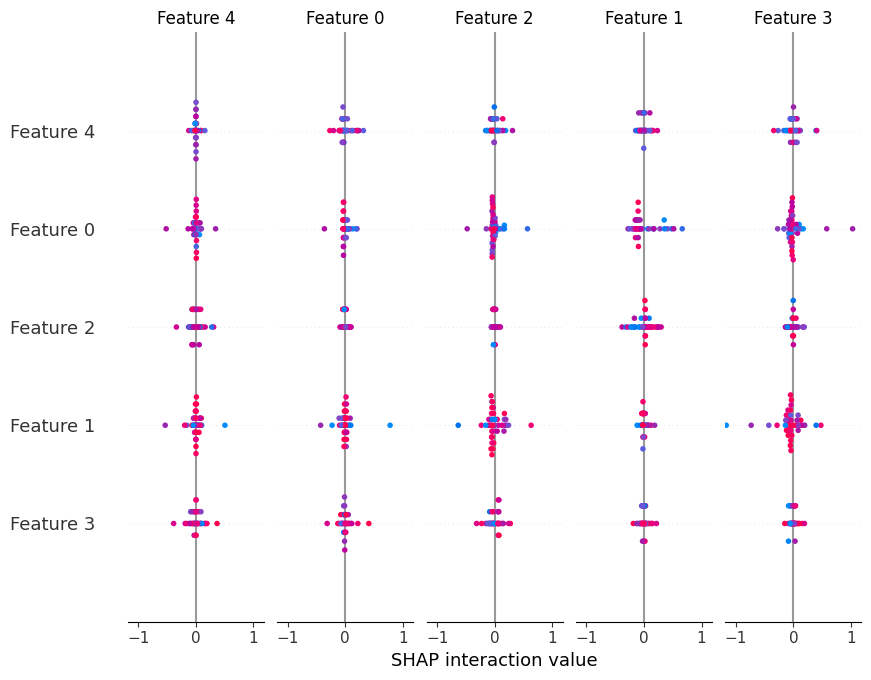

In [95]:
import shap
import matplotlib.pyplot as plt

# Ensure X_test is transformed correctly
X_test_array = X_test_transformed.toarray()  # 将 sparse matrix 转换为 NumPy 数组

# Select a subset of background samples for SHAP
num_samples = X_test_array.shape[0]
num_background_samples = min(50, num_samples)  
background = X_test_array[np.random.choice(num_samples, num_background_samples, replace=False), :] 

# Create a DeepExplainer object
explainer = shap.DeepExplainer(keras_model, background)

# Generate SHAP values
shap_values = explainer.shap_values(X_test_array)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_array)

<h3> Experimentation

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

In [ ]:
## Your Code and Answer:

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked